In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indrajeet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [3]:
iphone13_reviews

['\nOverall excellent product\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nExpensive\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nExpensive\n',
 '\nSwitched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Software wise, the notifications are really bad. Android compiles notifications much better. Also, it’s really tricky to transfer Whats

In [4]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)

In [5]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [6]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'overall', 'excellent', 'product', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'expensive', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'expensive', 'switched', 'from', 'android', 'to', 'iphone', 'here', 'are', 'my', 'pros', 'and', 'cons', 'pros', 'the', 'battery', 'life', 'on', 'the', 'pro', 'max', 'is', 'just', 'excellent', 'no', 'android', 'with', 'even', 'a', 'mah', 'can', 'beat', 'it', 'it', 'is', 'that', 'well', 'optimised', 'the', 'camera', 'as', 'you', 'can', 'guess', 'is', 'one', 'of', 'the', 'best', 'if', 'not', 'the', 'best', 'the', 'screen', 'with', 'hz', 'feels', 'so', 'smooth', 'it', 's', 'just', 'a', 'different', 'experience', 'androids', 'with', 'similar', 'refresh', 'don', 't', 'feel', 'so', 'smooth', 'because', 'they', 'are', 'poorly', 'optimised', 'cons', 'the', 'price', 'got', 'the'

In [8]:
import spacy


In [10]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [11]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

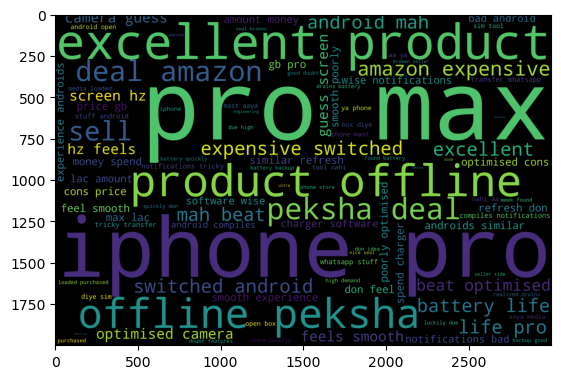

In [12]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [13]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [14]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

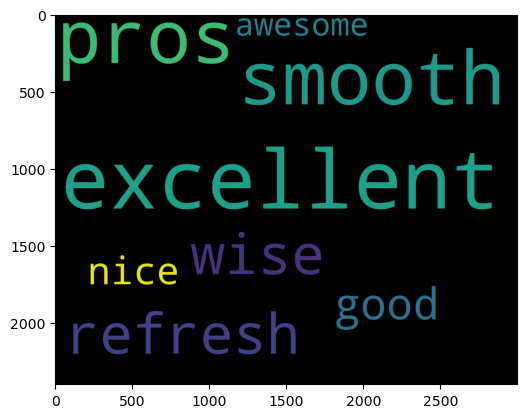

In [15]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [17]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [18]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

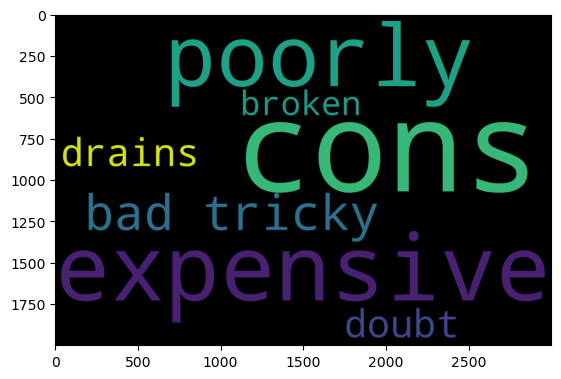

In [19]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)